In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [55]:
df = pd.read_hdf('./brfss.hdf5')
df

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,2.64,160.0,42.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,1.46,160.0,32.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,1.81,160.0,32.0
...,...,...,...,...,...,...,...,...,...
376876,1.0,173.0,97.52,8.0,12018.935300,3.0,5.57,170.0,32.0
201499,1.0,170.0,68.04,5.0,1939.162770,13.0,2.71,160.0,89.5
192176,1.0,183.0,117.93,4.0,762.342004,8.0,0.53,180.0,57.0
342705,1.0,175.0,61.23,5.0,1417.690180,2.0,4.29,170.0,27.0


In [56]:
#jawaban Nomer 1
df.shape

(100000, 9)

In [57]:
#Jawaban Nomer 2
df[['AGE']].groupby(['AGE']).size().to_frame('Jumlah').query('`AGE` == 27.0')

,Jumlah
AGE,
27.0,8116


In [58]:
#Jawaban Nomer 3
df[['INCOME2']].groupby('INCOME2').size().to_frame('Jumlah').shape

(8, 1)

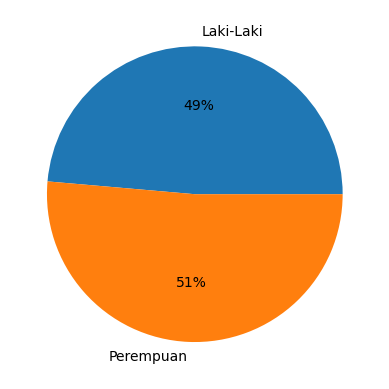

In [59]:
#Jawaban Nomer 4
ds = df[['SEX']].groupby('SEX').size().to_frame('Jumlah')
plt.pie(ds['Jumlah'],labels=['Laki-Laki','Perempuan'],autopct='%.0f%%')
plt.show()

In [85]:
def findOutliers(data,Q1,Q3,IQR):
    arr = []

    for i in data:
        if (i < (Q1 - 1.5*IQR) or i > (Q3 + 1.5*IQR)):
            arr.append(i)
    return pd.DataFrame(data=arr,columns=['HTM4'])

<Axes: ylabel='Count'>

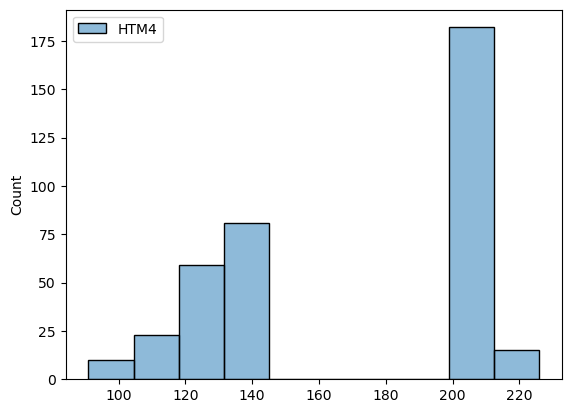

In [88]:
#Jawaban 5
dh = df[['HTM4']].dropna(subset=['HTM4'])
Q1 = dh['HTM4'].quantile(0.25)
Q3 = dh['HTM4'].quantile(0.75)
IQR = Q3 - Q1
data = findOutliers(dh['HTM4'],Q1,Q3,IQR)
sns.histplot(data=data)